In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10) #configurando tamanho e fonte dos gráficos
plt.rcParams.update({'font.size': 22})

# Métodos Numéricos

## Ajuste de curvas 

### Patric Lacouth

In [7]:
x = np.array([1,1.5,1.8,2], dtype=float)
y = np.array([1.2,1.3,1.7,2.3], dtype=float)

In [8]:
def reta(x):
    return -0.05 + 1.1 * x

In [9]:
def polinomio(x):
    return 3.94468085 -4.64032882 * x + 1.90232108 * x**2

# o problema 

Dado os pontos, encontrar a reta que melhor se ajusta aos pontos

x | y
---|---
1|1.2
1.5|1.3
1.8 | 1.7
2|2.3

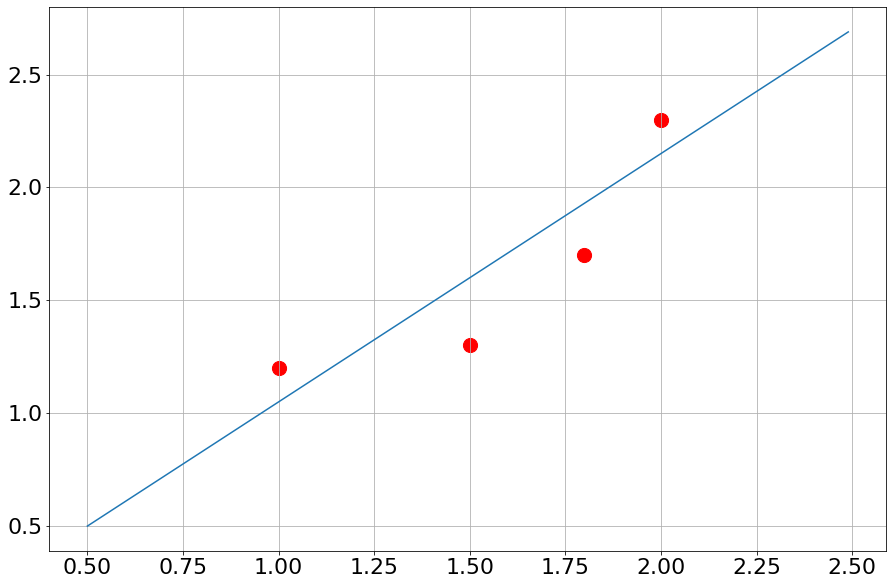

In [13]:
xa = np.arange(0.5,2.5,0.01)
ya = reta(xa)
plt.scatter(x,y,c='red',s=200)
plt.plot(xa,ya)
plt.grid(True)

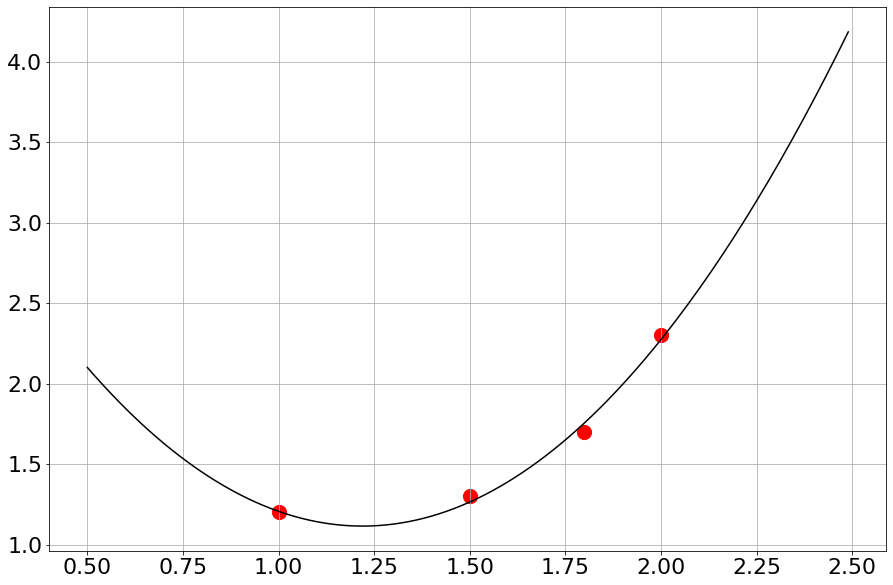

In [12]:
xa = np.arange(0.5,2.5,0.01)
yc = polinomio(xa)

plt.scatter(x,y,c='red',s=200)
plt.plot(xa,yc,c='black')
plt.grid(True)

# o resíduo

$$R = \sum_{i = 1}^N (f(x_i) - y_i)^2$$

$$R(a_1,a_2,a_3) = \sum_{i = 1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i)^2$$

Observamos que  é uma forma quadrática e que seu mínimo ocorre quando suas derivadas parciais primeiras são iguais a zero, isto é,

$$\frac{\partial R}{\partial a_1} = \frac{\partial}{\partial a_1} \sum_{i = 1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i)^2 = 0$$
$$\frac{\partial R}{\partial a_2} = \frac{\partial}{\partial a_2} \sum_{i = 1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i)^2 = 0$$
$$\frac{\partial R}{\partial a_3} = \frac{\partial}{\partial a_3} \sum_{i = 1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i)^2 = 0$$

aplicando a regra da cadeia

$$2 \sum_{i=1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i) \cdot 1 = 0$$

$$2 \sum_{i=1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i) \cdot x_i = 0$$

$$2 \sum_{i=1}^N (a_1 + a_2x_i + a_3x_i^2 - y_i) \cdot x_i^2 = 0$$

o sistema linear anterior pode ser escrito na forma matricial

$$\left[ \begin{matrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2\\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i^3 \\
\sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i^3 & \sum_{i=1}^N x_i^4
\end{matrix} \right]
\left[ \begin{matrix}
a_{1}\\
a_{2}\\
a_{3}
\end{matrix} \right]
=
\left[ \begin{matrix}
\sum_{i=1}^N y_i\\
\sum_{i=1}^N x_i y_i\\
\sum_{i=1}^N x_i^2 y_i
\end{matrix} \right]
$$

basta resolver o sistema para encontrar a curva $a_1 + a_2 x + a_3 x^2$ que melhor se adapta aos pontos

# implementando em Python
## importando as bibliotecas

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Dado os pontos, encontrar a reta que melhor se ajusta aos pontos

x | y
---|---
1|1.2
1.5|1.3
1.8 | 1.7
2|2.3

In [17]:
xi = np.array([1,1.5,1.8,2], dtype = float)
yi = np.array([1.2,1.3,1.7,2.3], dtype = float)
xi,yi

(array([1. , 1.5, 1.8, 2. ]), array([1.2, 1.3, 1.7, 2.3]))

## montando o sistema

$$\left[ \begin{matrix}
N & \sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2\\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i^3 \\
\sum_{i=1}^N x_i^2 & \sum_{i=1}^N x_i^3 & \sum_{i=1}^N x_i^4
\end{matrix} \right]
\left[ \begin{matrix}
a_{1}\\
a_{2}\\
a_{3}
\end{matrix} \right]
=
\left[ \begin{matrix}
\sum_{i=1}^N y_i\\
\sum_{i=1}^N x_i y_i\\
\sum_{i=1}^N x_i^2 y_i
\end{matrix} \right]
$$


In [19]:
N = xi.shape[0]
sum_xi = np.sum(xi)
sum_xi2 = np.sum(xi ** 2)
sum_xi3 = np.sum(xi ** 3)
sum_xi4 = np.sum(xi ** 4)

sum_yi = np.sum(yi)
sum_xiyi = np.sum(xi * yi)
sum_xi2yi = np.sum(xi ** 2 * yi)

A = np.array([[N, sum_xi, sum_xi2],[sum_xi, sum_xi2, sum_xi3], [sum_xi2, sum_xi3, sum_xi4]], dtype = float)
b = np.array([sum_yi, sum_xiyi, sum_xi2yi], dtype = float)
A,b


(array([[ 4.    ,  6.3   , 10.49  ],
        [ 6.3   , 10.49  , 18.207 ],
        [10.49  , 18.207 , 32.5601]]), array([ 6.5  , 10.81 , 18.833]))

# resolvendo o sistema

In [22]:
x = np.linalg.solve(A,b)
x

array([ 3.94468085, -4.64032882,  1.90232108])

# criando a função da curva

In [23]:
x

array([ 3.94468085, -4.64032882,  1.90232108])

In [24]:
def polinomio(x):
    return 3.94468085 - 4.64032882 * x + 1.90232108 * x ** 2

# traçando o gráfico

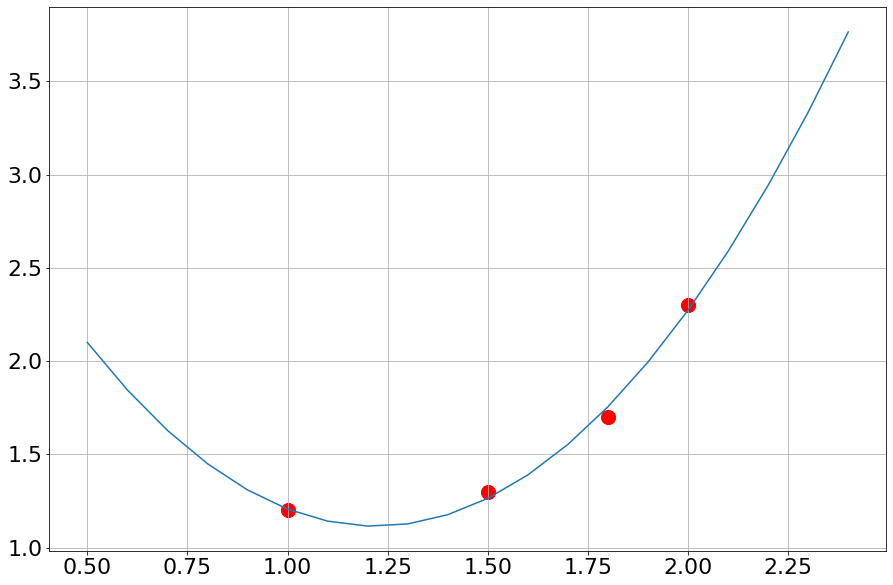

In [26]:
xa = np.arange(0.5,2.5,0.1)
ya = polinomio(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi, c='red',s=200)

plt.grid(True)

# now, go code!